# Beschaffung der Introductory Statements seit 1999

für jedes Jahr sind die einführenden Statements (Introductory Statements) zur PK unter einer URL wie dieser aufgelistet: https://www.ecb.europa.eu/press/pressconf/1999/html/index.en.html
Diese kann man über href nach den urls zu den IS scrapen. Alternativ könnte man auch die Urls zu den IS erstellen, denn sie sind recht einfach aufgebaut:
https://www.ecb.europa.eu/press/pressconf/1999/html/is991202.en.html
Sie bestehen aus einer Basisurl https://www.ecb.europa.eu/press/pressconf/
dem Jahr XXXX
+"/html/is" + Datum + ".en.html"

# 1. URLs zu den Statements

In [1]:
#Notwendige Importe
import requests
from bs4 import BeautifulSoup

In [2]:
#Basis-Urls für die Introductory Statements
basisurl = []
for i in range(1999,2020):
    url = "https://www.ecb.europa.eu/press/pressconf/" + str(i) + "/html/index.en.html"
    basisurl.append(url)
basisurl

['https://www.ecb.europa.eu/press/pressconf/1999/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2000/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2001/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2002/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2003/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2004/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2005/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2006/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2007/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2008/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2009/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2010/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2011/html/index.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2012/html/index.en.html',
 'https://www.ecb.eu

In [3]:
#Datumliste erstellen: Achtung hier nicht appenden, sondern extenden.
date_list = []
for element in basisurl:
    response = requests.get(element)
    soup = BeautifulSoup(response.text, 'lxml')
    
    date_lst = []
    for elem in soup.find_all('dt'):
        date_lst.append(elem.text)
    date_list.extend(date_lst)

In [6]:
len(date_list)

229

In [7]:
# Dies String-Liste hat 229 Elemente, ist aber noch nicht chronologisch. Das kann man mit Pandas ändern:
import pandas as pd

In [8]:
df = pd.DataFrame(date_list) #dataframe aus Variable date_list
df.columns= ["rawdate"] #Die Spalte soll "rawdate" heissen
df.head()

,rawdate
0,02/12/1999
1,04/11/1999
2,07/10/1999
3,09/09/1999
4,15/07/1999


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 1 columns):
rawdate    229 non-null object
dtypes: object(1)
memory usage: 1.9+ KB


In [9]:
#Das Datum ist noch in String-Form, aber wir wollen ein richtiges Datum: to_datetime 
df["rawdate"] = pd.to_datetime(df["rawdate"], format="%d/%m/%Y")

In [10]:
df.sort_values(by=['rawdate'], inplace=True, ascending=True) #aufsteigend sortieren
df.head()

,rawdate
10,1999-01-07
9,1999-02-04
8,1999-03-04
7,1999-04-08
6,1999-05-06


In [11]:
#jetzt Datum zum Index machen:
df.index = df["rawdate"]
df.head()

,rawdate
rawdate,
1999-01-07,1999-01-07
1999-02-04,1999-02-04
1999-03-04,1999-03-04
1999-04-08,1999-04-08
1999-05-06,1999-05-06


In [12]:
#In der URL hat das Datum die Form 990107. Diese kann man aus dem Datum konstruieren, wenn es ein String ist.
df['stringdate'] = df['rawdate'].dt.strftime('%Y%m%d') #neue Spalte, in der das Datum als String drin ist.
df.tail()

,rawdate,stringdate
rawdate,,
2018-07-26,2018-07-26,20180726
2018-09-13,2018-09-13,20180913
2018-10-25,2018-10-25,20181025
2018-12-13,2018-12-13,20181213
2019-01-24,2019-01-24,20190124


In [15]:
#Test: Wie kann man von einem String nur die den hinteren Teil (ab character 3) auswählen?
x = "20180726"
x[2:]

'180726'

In [16]:
#Diese Operation die ganze Spalte stringdate durchführen und in neuer Liste deaturl speichern:
dateurl = []
for i in df["stringdate"]:
    url = i[2:]
    dateurl.append(url)

In [17]:
dateurl[:5] #zeigt die ersten fünf Elemente der neuen Liste

['990107', '990204', '990304', '990408', '990506']

Aus dem Datum kann man auch die Jahreszahl ziehen, die ändert sich ja auch in der Url

In [18]:
yearurl = []
for i in df["stringdate"]:
    year = i[:4]
    yearurl.append(year)

In [19]:
# Aus der Basisurl, dem Jahr (yearurl) und dem Datum (dateurl) die url zusammensetzen 
#Achtung: ab April 2017 ändert sich die Url: vor .is steht noch ein ecb
#2019 ist die URL noch mals anders: Es braucht ein paar If-Bedingungen:
#https://www.ecb.europa.eu/press/pressconf/2019/html/ecb.is190124~cd3821f8f5.en.html

ganzeurl = []

for year,date in zip(yearurl, dateurl):
    if year == "2017" and date != "170119" and date != "170309"  or year == "2018":
        url = "https://www.ecb.europa.eu/press/pressconf/" + year + "/html/ecb.is" + date + ".en.html"
    elif year == "2019":
        url = "https://www.ecb.europa.eu/press/pressconf/2019/html/ecb.is190124~cd3821f8f5.en.html"
    else:
        url = "https://www.ecb.europa.eu/press/pressconf/" + year + "/html/is" + date + ".en.html"
    ganzeurl.append(url)
ganzeurl.remove('https://www.ecb.europa.eu/press/pressconf/2014/html/is141026.en.html')
ganzeurl

['https://www.ecb.europa.eu/press/pressconf/1999/html/is990107.en.html',
 'https://www.ecb.europa.eu/press/pressconf/1999/html/is990204.en.html',
 'https://www.ecb.europa.eu/press/pressconf/1999/html/is990304.en.html',
 'https://www.ecb.europa.eu/press/pressconf/1999/html/is990408.en.html',
 'https://www.ecb.europa.eu/press/pressconf/1999/html/is990506.en.html',
 'https://www.ecb.europa.eu/press/pressconf/1999/html/is990602.en.html',
 'https://www.ecb.europa.eu/press/pressconf/1999/html/is990715.en.html',
 'https://www.ecb.europa.eu/press/pressconf/1999/html/is990909.en.html',
 'https://www.ecb.europa.eu/press/pressconf/1999/html/is991007.en.html',
 'https://www.ecb.europa.eu/press/pressconf/1999/html/is991104.en.html',
 'https://www.ecb.europa.eu/press/pressconf/1999/html/is991202.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2000/html/is000105.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2000/html/is000203.en.html',
 'https://www.ecb.europa.eu/press/pressconf/2000/ht

In [20]:
#abspeichern als txt
with open("urls.txt", "w") as output:
    output.write(str(ganzeurl))

# 2. Texte extrahieren und in Dataframe laden

Nach dem gescheiterten Verscuch, die Texte über die URL zu scapen, kommt smart text extraction zum Einsatz:

In [21]:
#Zuerst die Importe:
import json
from readability.readability import Document
import urllib
import re
import requests

In [22]:
#zuerst der Einzelfall:
html = requests.get("https://www.ecb.europa.eu/press/pressconf/2019/html/ecb.is190124~cd3821f8f5.en.html").text
readable_article = Document(html).summary()
readable_title = Document(html).short_title()
text = re.sub('<[^<]+?>', '', readable_article)
text = text.encode("ascii", "ignore")
#muss noch von bytes in string umgewandelt werden (decode) und die q&a session gelöscht werden
intro = text.decode("utf8").split("* * *").pop(0)

In [23]:
#So sieht das Introductionary Statement der letzten Sitzung aus:
intro

'PRESS CONFERENCEMario Draghi, President of the ECB,Luis de Guindos, Vice-President of the ECB,Frankfurt am Main, 24 January 2019INTRODUCTORY STATEMENTJump to the transcript of the questions and answersLadies and gentlemen, the Vice-President and I are very pleased to welcome you to our press conference. We will now report on the outcome of todays meeting of the Governing Council, which was also attended by the Commission Vice-President, Mr Dombrovskis.Based on our regular economic and monetary analyses, we decided to keep the key ECB interest rates unchanged. We continue to expect them to remain at their present levels at least through the summer of 2019, and in any case for as long as necessary to ensure the continued sustained convergence of inflation to levels that are below, but close to, 2% over the medium term. Regarding non-standard monetary policy measures, we intend to continue reinvesting, in full, the principal payments from maturing securities purchased under the asset pur

In [24]:
length = len(intro) 
print("Das IS besteht aus " + str(length) + " Anschlägen")

Das IS besteht aus 6559 Anschlägen


In [25]:
#Wie oft kommt das Thema Kerninflation vor "Underlying inflation"?
corecount = intro.count("underlying inflation")
corecount

2

In [26]:
#nun für alle 230 Urls ab 1999. Das dauert ein wenig:
import json
from readability.readability import Document
import urllib
import re
import requests

intros = []
for element in ganzeurl:
    html = requests.get(element).text
    readable_article = Document(html).summary()
    readable_title = Document(html).short_title()
    text = re.sub('<[^<]+?>', '', readable_article)
    text = text.encode("ascii", "ignore")
#muss noch con bytes in string umgewandelt werden und die q&a session gelöscht werden
    decodetext = text.decode("utf8")
    if "at your disposal" in decodetext:
        intro = decodetext.split("at your disposal").pop(0)
    else:
        intro = decodetext.split("Transcript").pop(0)
    mini_dict = {"Url":element,
                "Text": intro}
    intros.append(mini_dict)

In [27]:
#als Pandas dataframe laden
df = pd.DataFrame(intros)
df.tail()

,Text,Url
223,"PRESS CONFERENCEMario Draghi, President of the...",https://www.ecb.europa.eu/press/pressconf/2018...
224,"PRESS CONFERENCEMario Draghi, President of the...",https://www.ecb.europa.eu/press/pressconf/2018...
225,"PRESS CONFERENCEMario Draghi, President of the...",https://www.ecb.europa.eu/press/pressconf/2018...
226,"PRESS CONFERENCEMario Draghi, President of the...",https://www.ecb.europa.eu/press/pressconf/2018...
227,"PRESS CONFERENCEMario Draghi, President of the...",https://www.ecb.europa.eu/press/pressconf/2019...


In [28]:
#es fehlt noch eine Spalte mit einem richtigen Datum mit timestamp:
# für den einzelfall:
test = "https://www.ecb.europa.eu/press/pressconf/1999/html/is991202.en.html"

In [29]:
#Funktion mit Namen "Date":
def date (elem):
    if "/20" in elem:
        return "20" + elem.split("is")[1][:6]
    else:
        return "19" + elem.split("is")[1][:6]

In [30]:
date(test)

'19991202'

In [31]:
#nun die Funktion mit apply auf alle Zeilen anwenden und in neue Spalte "Datum" dazufügen:
df["Datum"] = df["Url"].apply(date)
df.head()

,Text,Url,Datum
0,\n ECB Press conference: Introductory statem...,https://www.ecb.europa.eu/press/pressconf/1999...,19990107
1,\n ECB Press conference: Introductory statem...,https://www.ecb.europa.eu/press/pressconf/1999...,19990204
2,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/1999...,19990304
3,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/1999...,19990408
4,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/1999...,19990506


In [32]:
#Das Datum ist noch ein stringobjekt, aber wir wollen ein richtiges Datum: to_datemie 
df["Datum"] = pd.to_datetime(df["Datum"], format="%Y%m%d")

In [33]:
#jetzt Datum zum Index machen:
df.index = df["Datum"]
df.head()

,Text,Url,Datum
Datum,,,
1999-01-07,\n ECB Press conference: Introductory statem...,https://www.ecb.europa.eu/press/pressconf/1999...,1999-01-07
1999-02-04,\n ECB Press conference: Introductory statem...,https://www.ecb.europa.eu/press/pressconf/1999...,1999-02-04
1999-03-04,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/1999...,1999-03-04
1999-04-08,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/1999...,1999-04-08
1999-05-06,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/1999...,1999-05-06


In [34]:
del df["Datum"] #löscht die Spalte Datum rechts

In [35]:
df.reset_index()
df.head()

,Text,Url
Datum,,
1999-01-07,\n ECB Press conference: Introductory statem...,https://www.ecb.europa.eu/press/pressconf/1999...
1999-02-04,\n ECB Press conference: Introductory statem...,https://www.ecb.europa.eu/press/pressconf/1999...
1999-03-04,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/1999...
1999-04-08,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/1999...
1999-05-06,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/1999...


# 3. Texterkennung und einfache Analysen

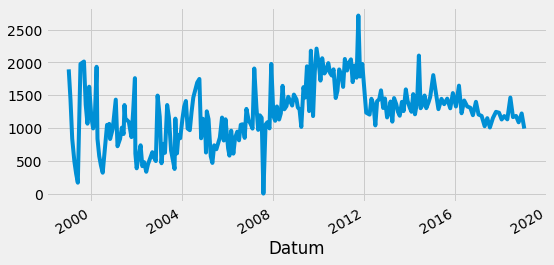

In [36]:
#wie lang waren die accounts eigentlich?
wordcounts = []
for element in df["Text"]:
    words = len(element.split(" "))
    wordcounts.append(words)
length = pd.Series(wordcounts)
df['length'] = length.values

#jetzt noch plotten:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
df['length'].plot(figsize=(8,4))

In [41]:
#es gibt ein paar Ausreissr, da stimmt etwas nicht:
ausreisser = df.sort_values(by=['length'], ascending=True) 
ausreisser.tail()

,Text,Url,length
Datum,,,
2010-03-04,\n Introductory statement with Q&amp;A \n J...,https://www.ecb.europa.eu/press/pressconf/2010...,2064
2014-06-05,\n Introductory statement to the press confe...,https://www.ecb.europa.eu/press/pressconf/2014...,2105
2009-09-03,\n Introductory statement with Q&amp;A \n J...,https://www.ecb.europa.eu/press/pressconf/2009...,2179
2009-12-03,\n Introductory statement with the Q&amp;A \...,https://www.ecb.europa.eu/press/pressconf/2009...,2211
2011-10-06,\n Introductory statement to the press confe...,https://www.ecb.europa.eu/press/pressconf/2011...,2714


In [42]:
#Das längste IS ist vom 6.10.2011, beim Treffen in Berlin hielt Buba-Präsident Jens Weidmann eine Ansprache.
#Bei vielen aus unerfindlichem Grund nur ein Teil des Textes extrahiert. 
#Es werden deshalb nur jene IS für weitere Analysen, die mehr als 600 Zeichen lang sind.

In [65]:
df_filtered = df[df['length'] > 600]
df_filtered.sort_values(by=['Datum'], inplace=True, ascending=True) 
df_filtered.head()

/Users/bignalenggenhager/.virtualenvs/luzern/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Text,Url,length
Datum,,,
1999-01-07,\n ECB Press conference: Introductory statem...,https://www.ecb.europa.eu/press/pressconf/1999...,1895
1999-02-04,\n ECB Press conference: Introductory statem...,https://www.ecb.europa.eu/press/pressconf/1999...,1440
1999-03-04,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/1999...,839
1999-07-15,\n ECB Press conference: Introductory statem...,https://www.ecb.europa.eu/press/pressconf/1999...,1977
1999-09-09,\n ECB Press conference: Introductory statem...,https://www.ecb.europa.eu/press/pressconf/1999...,2014


/Users/bignalenggenhager/.virtualenvs/luzern/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


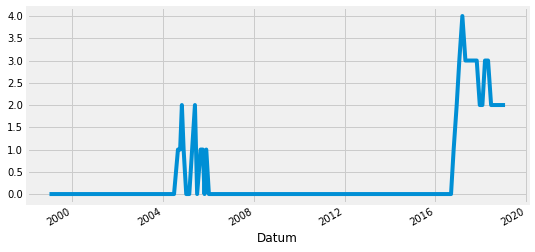

In [66]:
#Wie oft kommt das Thema Kerninflation vor also core oder "Underlying inflation"?

corecounts = []
for element in df_filtered["Text"]:
    corecount = element.count("underlying inflation") + element.count("core inflation")
    corecounts.append(corecount)
kern = pd.Series(corecounts)
df_filtered['kerninflation'] = kern.values
df_filtered['kerninflation'].plot(figsize=(8,4))

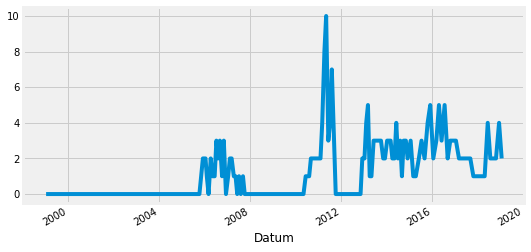

In [67]:
#Wie oft wurde erwähnt, dass die Geldpolitik locker (akkommodierend) sein müsse? 
#Hier kann auch mit dem ungefilterten df weitergearbeitet werden, die wenigen Fälle mit kurzem Inhalt verzerren
#das Ergebnis nicht

loosecounts = []
for element in df["Text"]:
    loosecount = element.count("accommodative") + element.count("accommodation")
    loosecounts.append(loosecount)
loose = pd.Series(loosecounts)
df['Akkommod'] = loose.values
df['Akkommod'].plot(figsize=(8,4))

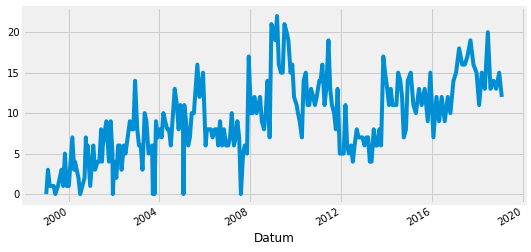

In [68]:
#Wie oft kommt das Thema inflation überhaupt vor?

inflationcounts = []
for element in df["Text"]:
    inflationcount = element.count("inflation")
    inflationcounts.append(inflationcount)
inflation = pd.Series(inflationcounts)
df['Inflation'] = inflation.values
df['Inflation'].plot(figsize=(8,4))

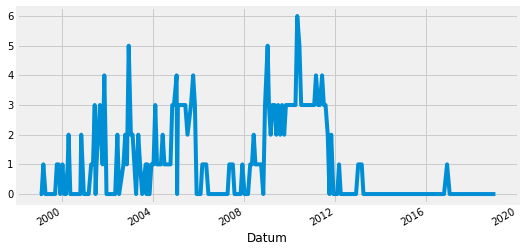

In [69]:
#Wann war der Inflationsdruck gross?

pressurecounts = []
for element in df["Text"]:
    pressurecount = element.count("inflationary pressure")
    pressurecounts.append(pressurecount)
inflationpressure = pd.Series(pressurecounts)
df['Inflationsdruck'] = inflationpressure.values
df['Inflationsdruck'].plot(figsize=(8,4))
#interessant:  unter Trichet ein Thema, dann mit Draghi nicht mehr

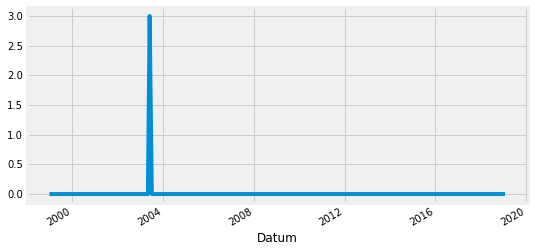

In [70]:
#Wie oft kommt das Thema Deflation vor?

deflationcounts = []
for element in df["Text"]:
    deflationcount = element.count("deflation")
    deflationcounts.append(deflationcount)
deflation = pd.Series(deflationcounts)
df['Deflation'] = deflation.values
df['Deflation'].plot(figsize=(8,4))

In [71]:
df[50:80]

,Text,Url,length,Akkommod,Inflation,Inflationsdruck,Deflation
Datum,,,,,,,
2000-10-05,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/2000...,897,0,7,0,0
2003-11-06,Today marks the first time that I had the hono...,https://www.ecb.europa.eu/press/pressconf/2003...,898,0,9,0,0
2001-06-07,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/2001...,911,0,8,3,0
2006-06-08,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/2006...,947,1,8,0,0
2006-03-02,"Ladies and gentlemen, let me welcome you to ou...",https://www.ecb.europa.eu/press/pressconf/2006...,962,0,8,1,0
2004-05-06,"Ladies and gentlemen, it is a pleasure to welc...",https://www.ecb.europa.eu/press/pressconf/2004...,969,0,8,1,0
2007-05-10,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/2007...,974,1,7,1,0
2000-12-14,"Ladies and gentlemen, the Vice-President and I...",https://www.ecb.europa.eu/press/pressconf/2000...,989,0,1,0,0
2019-01-24,"PRESS CONFERENCEMario Draghi, President of the...",https://www.ecb.europa.eu/press/pressconf/2019...,993,2,12,0,0


nur einmal wurde Deflation im IS erwähnt, im Julis 2003 nach eine Zinssenkung um 50 Bp unter Duisenberg:
"Let me at this point comment on the debate about the hypothetical risk of deflation. As far as the euro area is concerned, it should be recalled that inflation has been hovering around 2% for quite some time and that there are currently no forecasts indicating any deflationary risks. The ECB's monetary policy aims at inflation of below but close to 2% over the medium term. In this respect, inflation expectations should remain well anchored at this level, irrespective of shorter-term developments in prices. At the regional level, a period of relatively low price increases or even price level declines will improve a region's competitiveness within the currency area. Within a monetary union, deflation is not a meaningful concept when applied to individual regions."

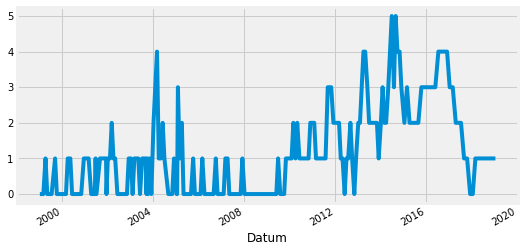

In [72]:
#Wann kam eigentlich der Appell an die Regierungen, strukturelle Reformen anzupacken?

structuralcounts = []
for element in df["Text"]:
    structuralcount = element.count("structural reforms")
    structuralcounts.append(structuralcount)
sreforms = pd.Series(structuralcounts)
df['Reformen'] = sreforms.values
df['Reformen'].plot(figsize=(8,4))

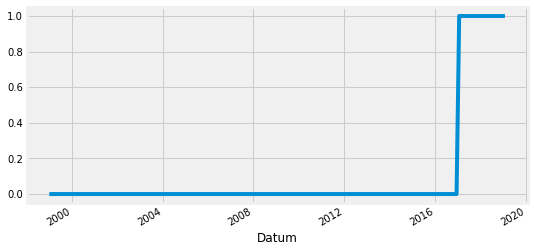

In [73]:
#Wann kam eigentlich der Appell an die Regierungen, strukturelle Reformen anzupacken?

benefitscounts = []
for element in df["Text"]:
    benefitscount = element.count("In order to reap the full benefits")
    benefitscounts.append(benefitscount)
benefits = pd.Series(benefitscounts)
df['Appell'] = benefits.values
df['Appell'].plot(figsize=(8,4))
#die Formulierung kam erst 2016 hinzu

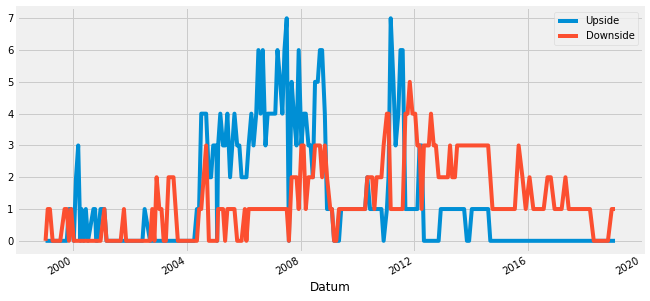

In [74]:
# wann war das Abwärstrisiko gross?

downsidecounts = []
for element in df["Text"]:
    downsidecount = element.count("downside")
    downsidecounts.append(downsidecount)
downside = pd.Series(downsidecounts)
df['Downside'] = downside.values

upsidecounts = []
for element in df["Text"]:
    upsidecount = element.count("upside")
    upsidecounts.append(upsidecount)
upside = pd.Series(upsidecounts)
df['Upside'] = upside.values

df.plot(y=['Upside', 'Downside'], figsize=(10,5), grid=True)


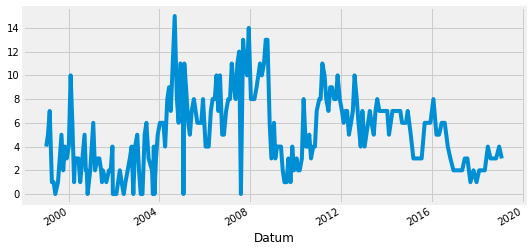

In [75]:
# wann waren die Risiken zahlreich?

riskcounts = []
for element in df["Text"]:
    riskcount = element.count("risk") + element.count("uncertainties")
    riskcounts.append(riskcount)
risk = pd.Series(riskcounts)
df['Risiken'] = risk.values
df['Risiken'].plot(figsize=(8,4))

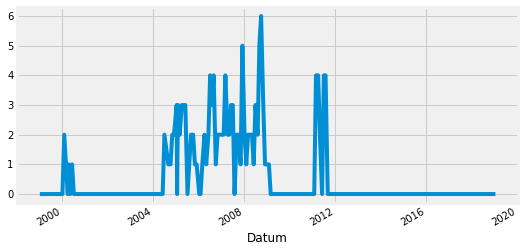

In [76]:
# wann war die Preisstabilität gefährdet?

inflcounts = []
for element in df["Text"]:
    inflcount = element.count("upside risks to price stability")
    inflcounts.append(inflcount)
inflrisk = pd.Series(inflcounts)
df['Inflationsrisiken'] = inflrisk.values
df['Inflationsrisiken'].plot(figsize=(8,4))

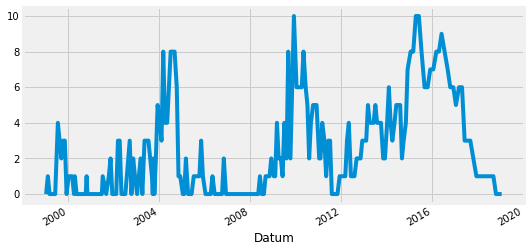

In [77]:
# wann war die Erholung der Wirtschaft ein Thema?

recovercounts = []
for element in df["Text"]:
    recovercount = element.count("recover")
    recovercounts.append(recovercount)
recovery = pd.Series(recovercounts)
df['Recovery'] = recovery.values
df['Recovery'].plot(figsize=(8,4))

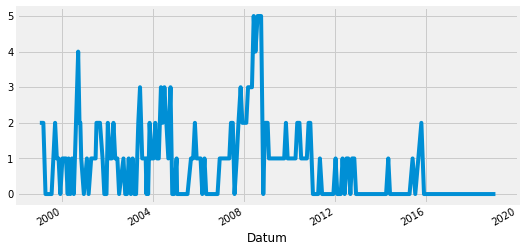

In [78]:
# wann gab es Grund zu Sorge?

concerncounts = []
for element in df["Text"]:
    concerncount = element.count("concern")
    concerncounts.append(concerncount)
concern = pd.Series(concerncounts)
df['Sorgen'] = concern.values
df['Sorgen'].plot(figsize=(8,4))

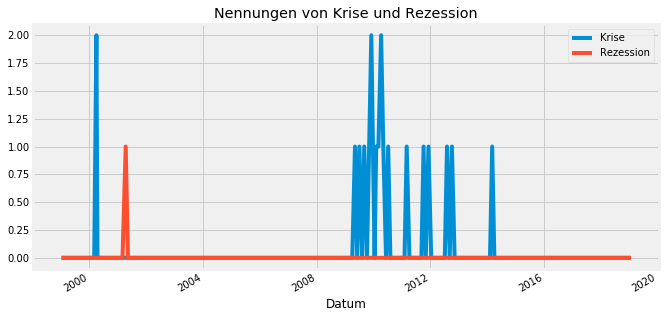

In [79]:
# Worte wie Krise oder Rezession werden vermieden:

crisiscounts = []
for element in df["Text"]:
    crisiscount = element.count("crisis")
    crisiscounts.append(crisiscount)
crisis = pd.Series(crisiscounts)
df['Krise'] = crisis.values

recessioncounts = []
for element in df["Text"]:
    recessioncount = element.count("recession")
    recessioncounts.append(recessioncount)
rec = pd.Series(recessioncounts)
df['Rezession'] = rec.values

df.plot(y=['Krise', 'Rezession'], figsize=(10,5), grid=True, title= "Nennungen von Krise und Rezession")

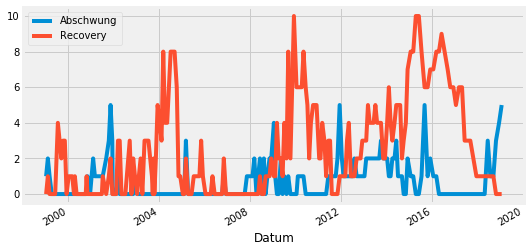

In [96]:
# Wann war die Verlangsamung bzw. Abschwächung ein Thema?
slowdowncounts = []
for element in df["Text"]:
    slowdowncount = element.count("slower") + element.count("weaker") + element.count("slowdown")
    slowdowncounts.append(slowdowncount)
slow = pd.Series(slowdowncounts)
df['Abschwung'] = slow.values
df.plot(y=['Abschwung', 'Recovery'],figsize=(8,4)) #plot mit der Spalte Recovery zusammen

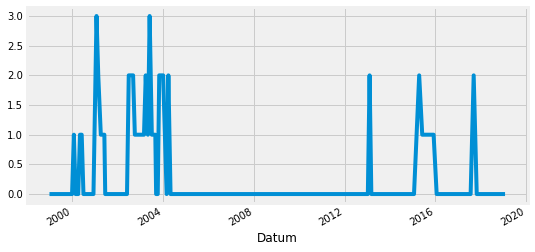

In [82]:
# Wie wichtig ist der Wechselkurs?

fxcounts = []
for element in df["Text"]:
    fxcount = element.count("euro exchange rate") + element.count("appreciation") + element.count("depreciation")
    fxcounts.append(fxcount)
fx = pd.Series(fxcounts)
df['Währung'] = fx.values
df['Währung'].plot(figsize=(8,4))

In [84]:
#similarity mit spacey: letzte Meldung beim Installieren im Terminal: You can now load the model via spacy.load('en')

In [85]:
import spacy
nlp = spacy.load('en')

In [86]:
target = nlp("ladies and gentlemen")
doc1 = nlp("women and honoured men.")

print(target.similarity(doc1))

0.7589439795772294


In [87]:
df_filtered.loc["2019-01-24", "Text"]

'PRESS CONFERENCEMario Draghi, President of the ECB,Luis de Guindos, Vice-President of the ECB,Frankfurt am Main, 24 January 2019INTRODUCTORY STATEMENTJump to the transcript of the questions and answersLadies and gentlemen, the Vice-President and I are very pleased to welcome you to our press conference. We will now report on the outcome of todays meeting of the Governing Council, which was also attended by the Commission Vice-President, Mr Dombrovskis.Based on our regular economic and monetary analyses, we decided to keep the key ECB interest rates unchanged. We continue to expect them to remain at their present levels at least through the summer of 2019, and in any case for as long as necessary to ensure the continued sustained convergence of inflation to levels that are below, but close to, 2% over the medium term. Regarding non-standard monetary policy measures, we intend to continue reinvesting, in full, the principal payments from maturing securities purchased under the asset pur

In [89]:
target = nlp(df_filtered.loc["2019-01-24", "Text"])
doc1 = nlp(df_filtered.loc["2018-12-13", "Text"])

print(target.similarity(doc1))

0.9980012550572973


/Users/bignalenggenhager/.virtualenvs/luzern/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


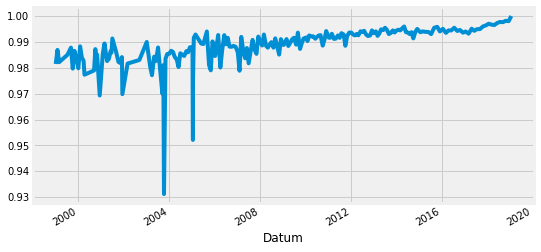

In [90]:
# Wie ähnlich sind die Intros zum aktuellen (target)?

similaritylist = []
target = nlp(df_filtered.loc["2019-01-24", "Text"])
for element in df_filtered["Text"]:
    similar = target.similarity(nlp(element))
    similaritylist.append(similar)
sim = pd.Series(similaritylist)
df_filtered['Similarity'] = sim.values
df_filtered['Similarity'].plot(figsize=(8,4))

In [91]:
#sentiment:
from textblob import TextBlob

/Users/bignalenggenhager/.virtualenvs/luzern/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


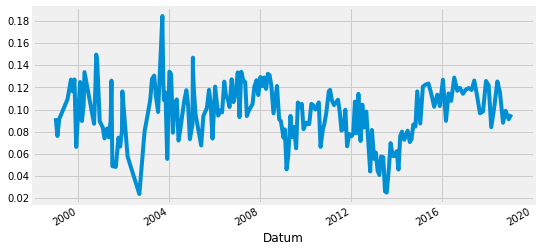

In [92]:
#wie positiv ist die Stimmung in den Accounts? Auch das dauert.
polarlist = []
for element in df_filtered["Text"]:
    blob = TextBlob(element)
    polar = blob.sentiment.polarity
    polarlist.append(polar)

sentiment = pd.Series(polarlist)
df_filtered['sentiment'] = sentiment.values #fügt Serie dem Dataframe df an
#plotten
df_filtered['sentiment'].plot(figsize=(8,4))